Note:- 

This data is from a data challenge. I am not sharing the data due to security reasons. But would share the code done for the analysis.

# TELE-MARKETING ANALYTICS

The following are the steps executed:-
1. [Load Data](#Load-Data)
2. [Set Date Time](#Set-Date-Time)
3. [Feature Engineering](#Feature-Engineering)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

   (4.1) [Correlation - Checklist_completion_rate, QuoteCount and SoldCount](#section_4.1)<br>
   (4.2) [Win rate](#section_4.2)<br>
   (4.3) [Correlation of various checklists with Quotes and Sold](#section_4.3)<br>
   (4.4) [Correlation of Hour with QuotesCount, Soldcount, CheckingCount](#section_4.4)<br>
   (4.5) [Correlation of Postcall with SoldCount and QuotesCount](#section_4.5)<br>
   (4.6) [Effect of Duration on Checklist completion, SoldCount, QuoteCount](#section_4.6)<br>
   (4.7) [Month relation with SoldCount](#section_4.7)<br>
   (4.8) [Correlation of day of week with Checklist completion, SoldCount, QuoteCount](#section_4.8)<br>
   (4.9) [User Level Top and Low Performer for Checklist Completion](#section_4.9)<br>
   (4.10)[User Level correlation between Checklist completion, QuoteCount, SoldCount](#section_4.10)<br>
   (4.11)[User Level Top 5 performer based on Sold Rate](#section_4.11)<br>
<br>   
5. [Insights](#section_5)
   

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta as td
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load Data

In [81]:
#Lets load the data
call_logs_df = pd.read_csv('call_logs.csv')
call_logs_df.head(2)

,Rep ID,Start Time,End Time,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount
0,662,6/7/20 16:29,6/7/20 16:41,0,1,0,1,1,0,0,0,0,0,1,0,2,0,1,0,6,1,1,0
1,387,6/7/20 16:32,6/7/20 16:56,0,1,0,0,0,0,1,0,0,1,1,21,10,0,1,1,11,2,0,0


In [82]:
call_logs_df.shape

(12132, 23)

In [83]:
#check variable type 
print(call_logs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 23 columns):
Rep ID                                                                                             12132 non-null int64
Start Time                                                                                         12132 non-null object
End Time                                                                                           12132 non-null object
Checklist - Why are you interested in one of our insurance policies today?                         12132 non-null int64
Checklist - What sparked your interest in insurance at this time?                                  12132 non-null int64
Checklist - Has anything changed in your living situation since your last policy got started?      12132 non-null int64
Checklist - What's most important to you in an insurance company?                                  12132 non-null int64
Checklist - Why didn't you move forward with the 

In [84]:
#Check null values
print(call_logs_df.isnull().sum())

Rep ID                                                                                             0
Start Time                                                                                         0
End Time                                                                                           0
Checklist - Why are you interested in one of our insurance policies today?                         0
Checklist - What sparked your interest in insurance at this time?                                  0
Checklist - Has anything changed in your living situation since your last policy got started?      0
Checklist - What's most important to you in an insurance company?                                  0
Checklist - Why didn't you move forward with the last quote you received?                          0
Checklist - What would you like to change about your current insurance coverage?                   0
Checklist - What do you find most important: price, coverarge, or something else?          

In [85]:
call_logs_df.describe()

,Rep ID,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount
count,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000
mean,482.970656,0.095945,0.490603,0.011128,0.139383,0.215875,0.098005,0.060501,0.013188,0.050775,0.167738,0.184306,3.470244,5.865892,0.042450,1.822453,1.019205,4.881058,1.359710,0.518793,0.223459
std,201.981034,0.294527,0.499932,0.104903,0.346360,0.411445,0.297334,0.238423,0.114085,0.219547,0.373649,0.514395,5.410053,7.056952,0.218873,2.551967,1.848488,7.310282,2.158775,0.499667,0.416580
min,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,358.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,494.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000
75%,662.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000,0.000000,2.000000,1.000000,7.000000,2.000000,1.000000,0.000000
max,931.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,113.000000,234.000000,4.000000,147.000000,28.000000,270.000000,66.000000,1.000000,1.000000


### Set Date Time

In [86]:
call_logs_df['Start Time']= pd.to_datetime(call_logs_df['Start Time'])
call_logs_df['End Time']= pd.to_datetime(call_logs_df['End Time'])
call_logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 23 columns):
Rep ID                                                                                             12132 non-null int64
Start Time                                                                                         12132 non-null datetime64[ns]
End Time                                                                                           12132 non-null datetime64[ns]
Checklist - Why are you interested in one of our insurance policies today?                         12132 non-null int64
Checklist - What sparked your interest in insurance at this time?                                  12132 non-null int64
Checklist - Has anything changed in your living situation since your last policy got started?      12132 non-null int64
Checklist - What's most important to you in an insurance company?                                  12132 non-null int64
Checklist - Why didn't you move f

### Feature Engineering

In [87]:
#Taking on the Start time 
call_logs_df['hour'] = call_logs_df['Start Time'].dt.hour
call_logs_df['dayofweek'] = call_logs_df['Start Time'].dt.dayofweek
call_logs_df['month'] = call_logs_df['Start Time'].dt.month
call_logs_df['dayofmonth'] = call_logs_df['Start Time'].dt.day

call_logs_df['duration'] = call_logs_df['End Time'] - call_logs_df['Start Time']
call_logs_df['duration(min)']= call_logs_df['duration']/np.timedelta64(1, 'm') #convert timedelta into minutes
call_logs_df.drop(columns ='duration', inplace= True)

call_logs_df.head(2)

,Rep ID,Start Time,End Time,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount,hour,dayofweek,month,dayofmonth,duration(min)
0,662,2020-06-07 16:29:00,2020-06-07 16:41:00,0,1,0,1,1,0,0,0,0,0,1,0,2,0,1,0,6,1,1,0,16,6,6,7,12.0
1,387,2020-06-07 16:32:00,2020-06-07 16:56:00,0,1,0,0,0,0,1,0,0,1,1,21,10,0,1,1,11,2,0,0,16,6,6,7,24.0


Checklist_completion_rate = (# of checklist items with a 1 / total # of checklist items)

In [88]:
list_new = list(call_logs_df)
list_new= list_new[3:13] # selecting only the checklist

In [89]:
checklist_sum= call_logs_df[list_new].sum(axis=1)
checklist_count = call_logs_df[list_new].count(axis=1)

call_logs_df['checklist_sum'] = checklist_sum
call_logs_df['Checklist_completion_rate'] = checklist_sum/checklist_count
call_logs_df.head(2)

,Rep ID,Start Time,End Time,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount,hour,dayofweek,month,dayofmonth,duration(min),checklist_sum,Checklist_completion_rate
0,662,2020-06-07 16:29:00,2020-06-07 16:41:00,0,1,0,1,1,0,0,0,0,0,1,0,2,0,1,0,6,1,1,0,16,6,6,7,12.0,3,0.3
1,387,2020-06-07 16:32:00,2020-06-07 16:56:00,0,1,0,0,0,0,1,0,0,1,1,21,10,0,1,1,11,2,0,0,16,6,6,7,24.0,3,0.3


### Exploratory Data Analysis 

<a id='section_4.1'></a>
#### 4.1 Correlation - Checklist_completion_rate, QuoteCount and SoldCount

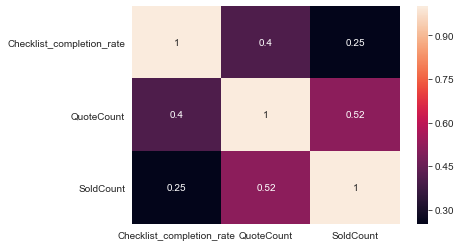

In [90]:
corr_call_logs_df= call_logs_df[['Checklist_completion_rate', 'QuoteCount', 'SoldCount']]
corr_call_logs_df.head()

#correlation diagram
corrMatrix = corr_call_logs_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

The cut off for correlation depends upon the business. Assuming  0.5 as threshold, I can see that there is some correlation between the checklist_completion_rate with QuoteCount. But it reduces with SoldCount

<a id='section_4.2'></a>
#### 4.2  Win rate 

Win rate =  (# of calls that hit the last checklist question / total # of calls)

In [91]:
win_df = call_logs_df["Checklist - Please confirm for me that you want to apply for an insurance policy today with us."].sum(axis=0)
win_rate = win_df/len(call_logs_df)
win_rate*100

16.77382129904385

<a id='section_4.3'></a>
#### 4.3 Correlation of various checklists with Quotes and Sold

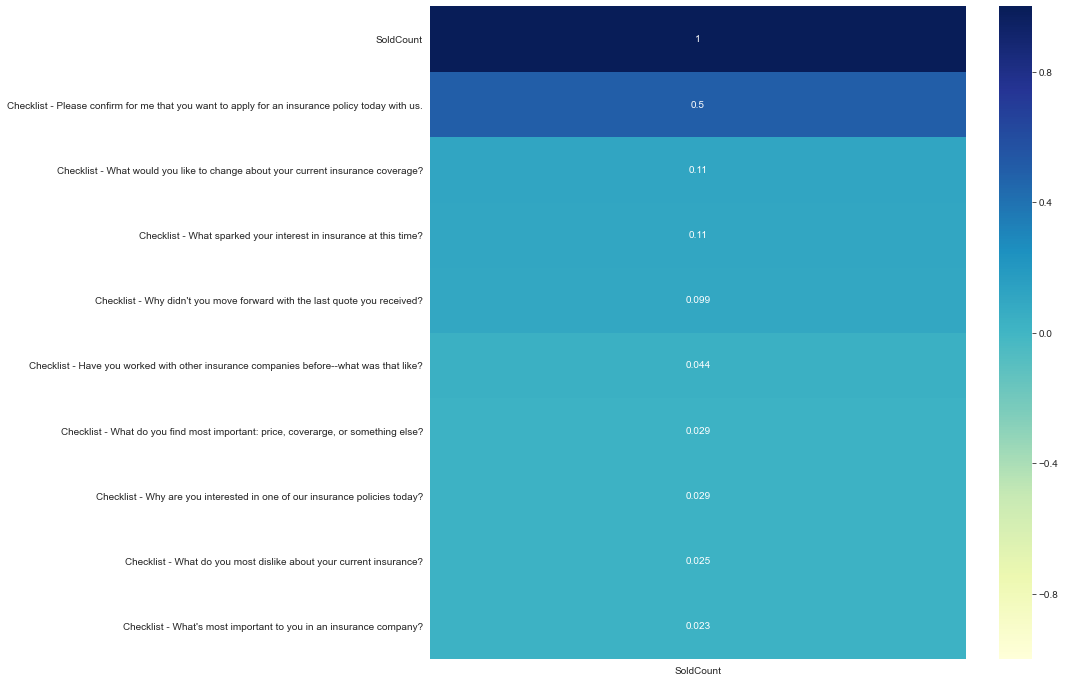

In [92]:
corr_checklist_df = call_logs_df.iloc[:,3:13]
corr_checklist_df['SoldCount'] = call_logs_df['SoldCount'].values

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_checklist_df.corr()[['SoldCount']].sort_values('SoldCount').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

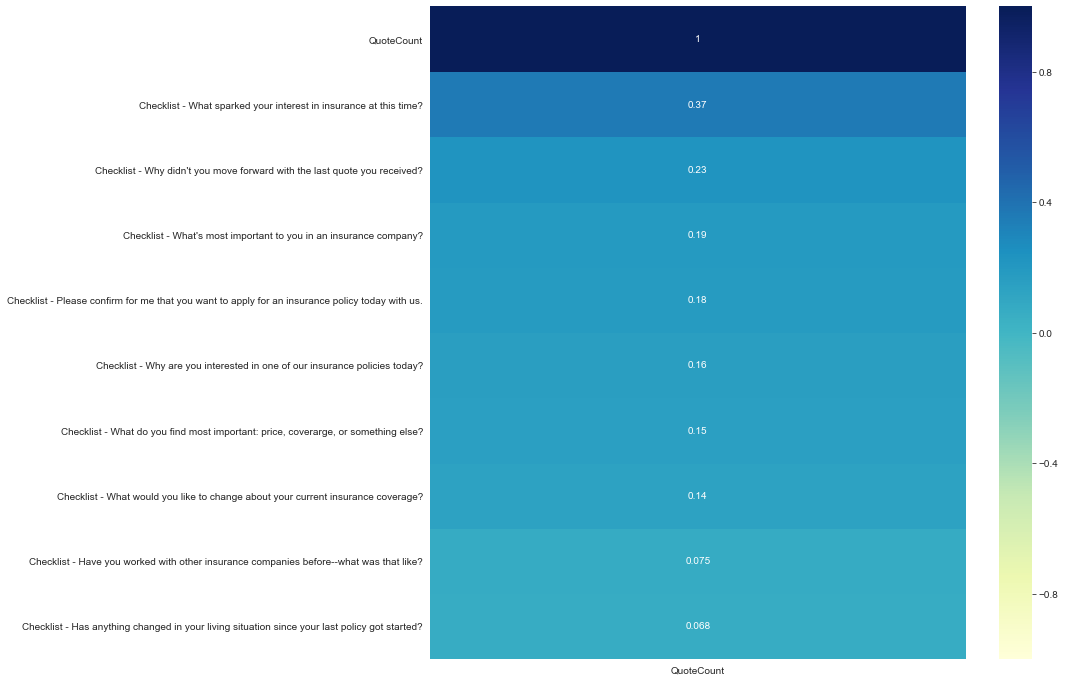

In [93]:
corr_checklist_df = call_logs_df.iloc[:,3:13]
corr_checklist_df['QuoteCount'] = call_logs_df['QuoteCount'].values

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_checklist_df.corr()[['QuoteCount']].sort_values('QuoteCount').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

<a id='section_4.4'></a>
#### 4.4 Correlation of Hour with QuotesCount, Soldcount, CheckingCount

In [94]:
# Interestingly the calls we done from 12 PM to 12 AM. Hence, we may assume that customers were from the some other location.
call_logs_df['hour'].unique()

array([16, 17, 18, 19, 20, 21, 22, 23, 13, 14, 15,  0, 12], dtype=int64)

<AxesSubplot:xlabel='hour', ylabel='count'>

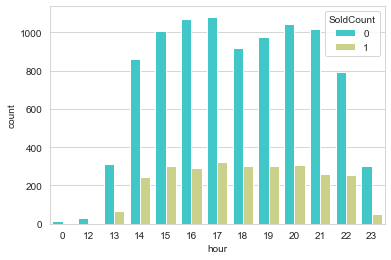

In [95]:
sns.countplot(x='hour',hue='SoldCount',data=call_logs_df,palette='rainbow')

I cant see significant insights from the graph. Except that call reps call less at starting 12pm and at the end 12am

Lets try Cramer's V test to see if theres any correlation between 
1. hour and SoldCount
2. hour and Checklist
3. hour and Checklist completion

hour of week w.r.t. Quote count and Sold count

1. NULL HYPOTHESIS - There is no relationship between hour with Quote count and Sold count
2. ALT. HYPOTHESIS - There is a relation between hour with Quote count and Sold count

In [96]:
#Create contengency table
hout_ct = pd.crosstab(index= call_logs_df['hour'], columns= call_logs_df['SoldCount'])
hout_ct

SoldCount,0,1
hour,,
0,14,3
12,29,3
13,310,66
14,861,246
15,1005,304
16,1067,291
17,1081,325
18,918,300
19,977,303


In [97]:
hout_ct.iloc[0].values

array([14,  3], dtype=int64)

In [98]:
hout_ct_array = [hout_ct.iloc[x].values for x in range(0,len(hout_ct))]

In [99]:
from scipy import stats
(chi2,p,dof,_) = stats.chi2_contingency(hout_ct_array)
print(chi2)

33.780599109604516


In [100]:
np.sqrt(chi2/len(call_logs_df))

0.05276761593622413

The correlation looks very small

In [101]:
hout_ct = pd.crosstab(index= call_logs_df['hour'], columns= call_logs_df['Checklist_completion_rate'])
hout_ct_array = [hout_ct.iloc[x].values for x in range(0,len(hout_ct))]
from scipy import stats
(chi2,p,dof,_) = stats.chi2_contingency(hout_ct_array)
np.sqrt(chi2/len(call_logs_df))

0.14583016262099155

Hour is better correlated with Checklist_completion_rate than SoldCount

<a id='section_4.5'></a>
#### 4.5 Correlation of Postcall with SoldCount and QuotesCount

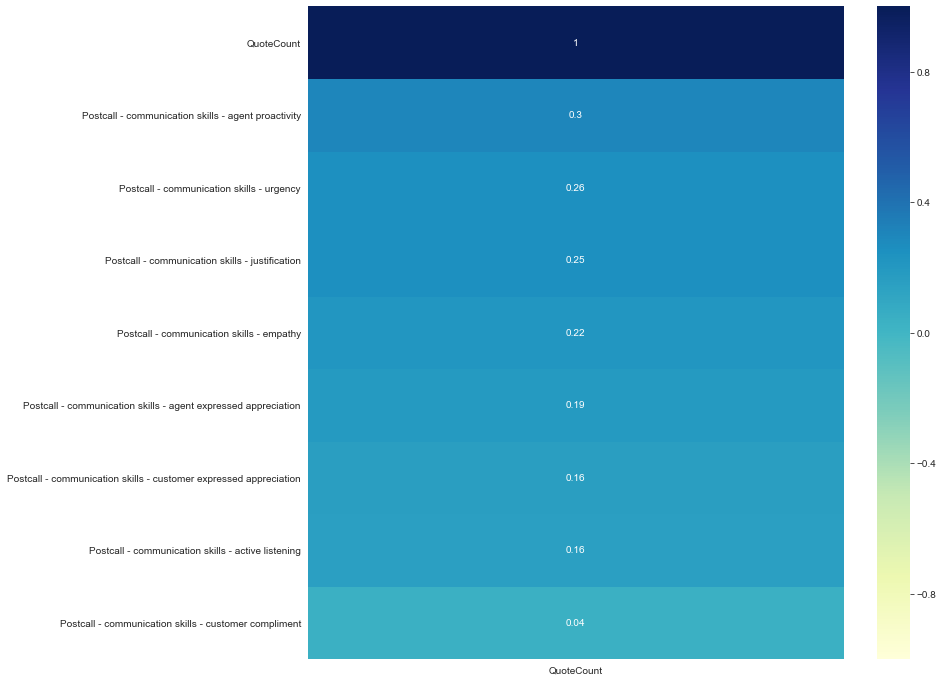

In [102]:
corr_call_logs_df= call_logs_df.iloc[:,13:22]

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_call_logs_df.corr()[['QuoteCount']].sort_values('QuoteCount').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

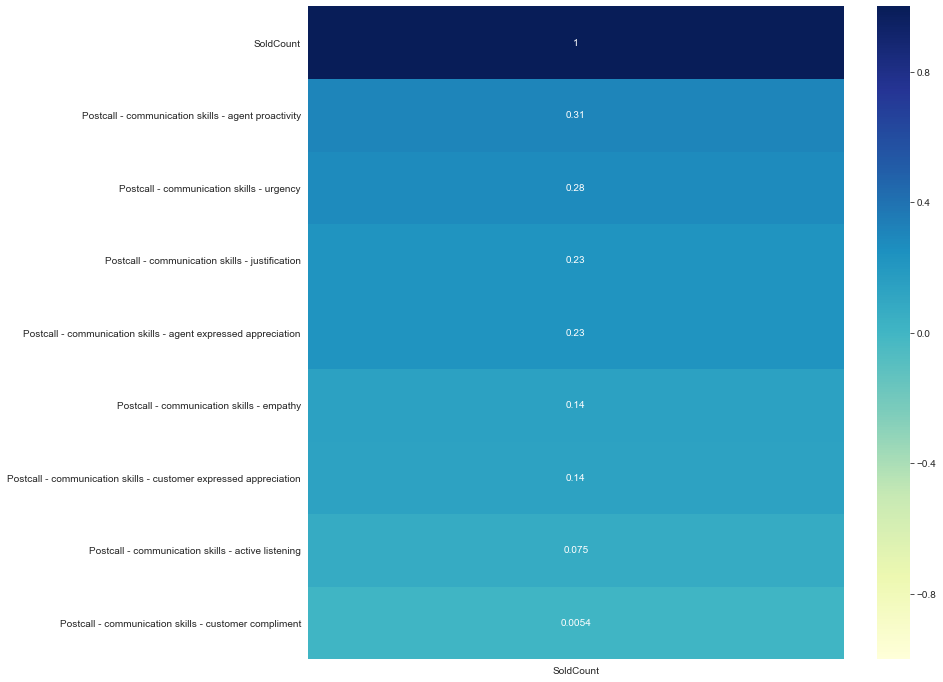

In [103]:
corr_call_logs_df = call_logs_df.iloc[:,13:21]
corr_call_logs_df['SoldCount'] = call_logs_df['SoldCount'].values
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_call_logs_df.corr()[['SoldCount']].sort_values('SoldCount').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

Agent Proactive communication and urgency leads the way in both cases

<a id='section_4.6'></a>
#### Effect of Duration on Checklist completion, SoldCount, QuoteCount

[(10.0, 40.0)]

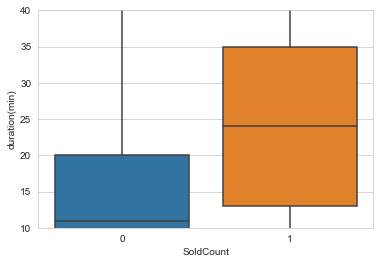

In [104]:
ax= sns.boxplot('SoldCount','duration(min)', data=call_logs_df)
ax.set(ylim=(10, 40))

[(10.0, 40.0)]

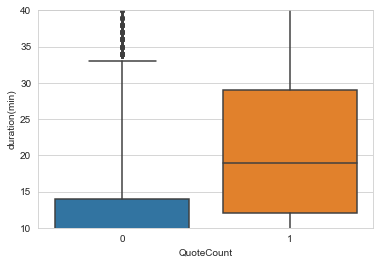

In [105]:
ax= sns.boxplot('QuoteCount','duration(min)', data=call_logs_df)
ax.set(ylim=(10, 40))

[(0.0, 90.0)]

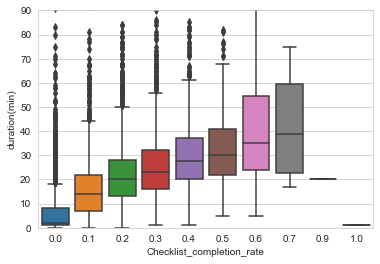

In [106]:
ax= sns.boxplot('Checklist_completion_rate','duration(min)', data=call_logs_df)
ax.set(ylim=(0, 90))

AS the duration increases, all the metrics increases

<a id='section_4.7'></a>
#### 4.7 Month relation with SoldCount

<AxesSubplot:xlabel='SoldCount', ylabel='count'>

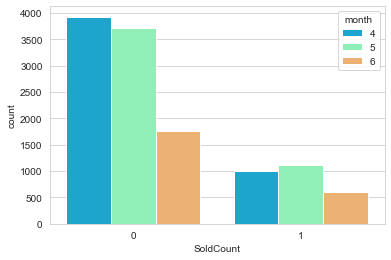

In [107]:
sns.set_style('whitegrid')
sns.countplot(x='SoldCount',hue='month',data=call_logs_df,palette='rainbow')

Since its just 2 month and incomplete data for the last moth, I am not exploring it further

<a id='section_4.8'></a>
#### 4.8 Correlation of day of week with Checklist completion, SoldCount, QuoteCount

<AxesSubplot:xlabel='SoldCount', ylabel='count'>

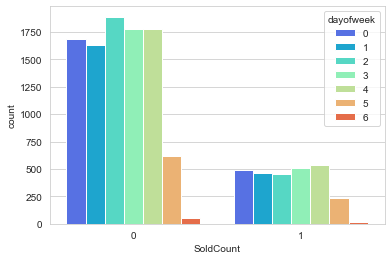

In [108]:
sns.countplot(x='SoldCount',hue='dayofweek',data=call_logs_df,palette='rainbow')

In [109]:
daywise_log_df = call_logs_df.groupby('dayofweek')['checklist_sum'].agg(['sum','count'])

In [110]:
#Avrage checklist per call rep
#Monday is 0 and Sunday is 6
daywise_log_df['Checklist_completion_rate']= daywise_log_df['sum']/daywise_log_df['count']
daywise_log_df

,sum,count,Checklist_completion_rate
dayofweek,,,
0,2871,2183,1.315163
1,2871,2093,1.371715
2,2997,2340,1.280769
3,2987,2278,1.311238
4,3143,2311,1.360017
5,1318,855,1.541520
6,108,72,1.500000


Day of week w.r.t. Quote count and Sold count

1. NULL HYPOTHESIS - There is no relationship between Day of week with Quote count and Sold count
2. ALT. HYPOTHESIS - There is a relation between Day of week with Quote count and Sold count

I would avoid using Fisher's test as we have 6 unique values in Day of week. I would recommend using for less than 5 unique values.

In [111]:
day_ct = pd.crosstab(index= call_logs_df['dayofweek'], columns= call_logs_df['SoldCount'])
day_ct_array = [day_ct.iloc[x].values for x in range(0,len(day_ct))]
from scipy import stats
(chi2,p,dof,_) = stats.chi2_contingency(day_ct_array)
np.sqrt(chi2/len(call_logs_df))

0.04974677928673737

The correlation looks bleak

In [112]:
#Create contengency table
day_ct = pd.crosstab(index= call_logs_df['dayofweek'], columns= call_logs_df['Checklist_completion_rate'])
day_ct_array = [day_ct.iloc[x].values for x in range(0,len(day_ct))]
from scipy import stats
(chi2,p,dof,_) = stats.chi2_contingency(day_ct_array)
np.sqrt(chi2/len(call_logs_df))

0.08437136219752311

There is no correlation for day of week

<a id='section_4.9'></a>
#### 4.9 User Level Top and Low Performer for Checklist Completion

In [113]:
user_log_df = call_logs_df.groupby('Rep ID')['checklist_sum'].agg(['sum','count'])

In [114]:
#Avrage checklist per call rep
user_log_df['Checklist_completion_rate']= user_log_df['sum']/user_log_df['count']
user_log_df

,sum,count,Checklist_completion_rate
Rep ID,,,
161,1488,996,1.493976
180,898,1141,0.787029
274,1298,896,1.448661
387,1364,927,1.471413
393,409,553,0.739602
417,799,813,0.982780
442,983,591,1.663283
494,602,303,1.986799
548,151,85,1.776471


In [115]:
#Top 5 Performer according to checking completion rate
user_log_df.sort_values('Checklist_completion_rate', ascending=False ).head(5)

,sum,count,Checklist_completion_rate
Rep ID,,,
853,671,267,2.513109
703,1564,695,2.250360
494,602,303,1.986799
548,151,85,1.776471
442,983,591,1.663283


In [116]:
#Low 5 performer
user_log_df.sort_values('Checklist_completion_rate', ascending=False ).tail(5)

,sum,count,Checklist_completion_rate
Rep ID,,,
417,799,813,0.982780
724,680,707,0.961810
643,22,23,0.956522
180,898,1141,0.787029
393,409,553,0.739602


<a id='section_4.10'></a>
#### 4.10 User Level correlation between Checklist completion, QuoteCount, SoldCount

In [117]:
user_log_df['Sum_Quotes']= call_logs_df.groupby('Rep ID')['QuoteCount'].sum()
user_log_df['Sum_Sold']= call_logs_df.groupby('Rep ID')['SoldCount'].sum()
user_log_df

,sum,count,Checklist_completion_rate,Sum_Quotes,Sum_Sold
Rep ID,,,,,
161,1488,996,1.493976,643,303
180,898,1141,0.787029,421,283
274,1298,896,1.448661,487,201
387,1364,927,1.471413,403,215
393,409,553,0.739602,265,109
417,799,813,0.982780,464,174
442,983,591,1.663283,369,88
494,602,303,1.986799,202,39
548,151,85,1.776471,53,16


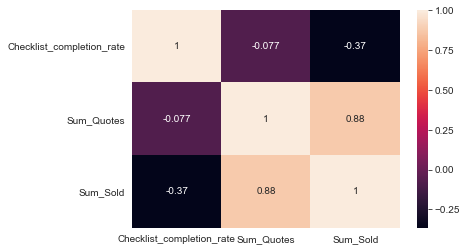

In [118]:
corr_user_log_df= user_log_df[['Checklist_completion_rate', 'Sum_Quotes', 'Sum_Sold']]
corr_user_log_df.head()

#correlation diagram
corrMatrix = corr_user_log_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<a id='section_4.11'></a>
#### 4.11 User Level Top 5 performer based on Sold Rate

In [119]:
user_df = call_logs_df.groupby('Rep ID').sum()

In [120]:
user_df.head(2)

,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount,hour,dayofweek,month,dayofmonth,duration(min),checklist_sum,Checklist_completion_rate
Rep ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,213,399,2,189,401,20,5,43,2,214,110,1664,7211,37,1840,691,2707,1813,643,303,17730,2211,4823,13973,19704.0,1488,148.8
180,2,196,1,21,162,16,3,6,283,208,183,4343,8271,56,1529,758,8391,645,421,283,21221,2729,5514,16892,17485.0,898,89.8


In [122]:
#Top 5 performer based on sold rate
user_df['SoldRate']= user_df['SoldCount']/user_log_df['count']
user_df.sort_values('SoldRate', ascending=False ).head(5)

,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount,hour,dayofweek,month,dayofmonth,duration(min),checklist_sum,Checklist_completion_rate,SoldRate
Rep ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,213,399,2,189,401,20,5,43,2,214,110,1664,7211,37,1840,691,2707,1813,643,303,17730,2211,4823,13973,19704.0,1488,148.8,0.304217
724,142,201,0,27,114,29,7,2,2,156,64,2020,3195,24,1114,790,2604,2042,320,196,12381,1820,3571,9228,9287.0,680,68.0,0.277228
716,4,353,2,53,117,263,17,20,24,209,111,4008,4331,37,1787,774,3626,1018,367,228,15378,2130,4102,12575,16067.0,1062,106.2,0.264501
180,2,196,1,21,162,16,3,6,283,208,183,4343,8271,56,1529,758,8391,645,421,283,21221,2729,5514,16892,17485.0,898,89.8,0.248028
586,1,566,1,122,21,60,112,9,10,161,267,1991,5288,30,1627,454,4447,637,489,197,15096,1892,3862,12181,15072.0,1063,106.3,0.233136


In [123]:
user_df.iloc[0:5,-1:]

,SoldRate
Rep ID,
161,0.304217
180,0.248028
274,0.224330
387,0.231931
393,0.197107


<a id='section_5'></a>
#### 5. Insights

Insights

1. Duration is the most significant feature. As the Call rep takes more time to explain, the CheckingRate, QuoteCount, SoldCount increases
2. Win Percentage = 16.77382129904385
3. Checklist - Please confirm for me that you want to apply for an insurance policy today with us.  Urgency was major influencer in SoldCount
4. Checklist - What sparked your interest in insurance at this time?, Why didn't you move forward with the last quote you received? these are other which influenced more

5. From 12-2 pm,and from 11pm-12 am there seems to be very few calls. Call REps should try to increase their call during this period.
6. Agent Proactive communication and urgency leads the way in both cases
7. There is no correlation between day of week
8. Top 5 performer based on SoldCount, CheckingCount